In [1]:
import pickle
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Read Train data
df = pd.read_csv("Healthcare-Diabetes.csv")

df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


In [6]:
X = df.drop(columns = ['Outcome', 'Id'])
Y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

In [7]:
RF = RandomForestClassifier(n_jobs = -1, max_depth = 8, criterion = 'entropy')

RF.fit(X_train, y_train)

y_hat = RF.predict(X_test)

y_hat_train = RF.predict(X_train)

print(classification_report(y_test, y_hat))
print("Train Accuracy score: ", round((accuracy_score(y_train, y_hat_train) * 100), 2), "%")
print("Test Accuracy score: ", round((accuracy_score(y_test, y_hat) * 100), 2), "%")
print("Cross Validation:\n", cross_val_score(RF, X, Y, cv = 5, n_jobs = -1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       378
           1       0.96      0.86      0.91       176

    accuracy                           0.95       554
   macro avg       0.95      0.92      0.94       554
weighted avg       0.95      0.95      0.95       554

Train Accuracy score:  96.88 %
Test Accuracy score:  94.58 %
Cross Validation:
 [0.94584838 0.96389892 0.96750903 0.96745027 0.94213382]


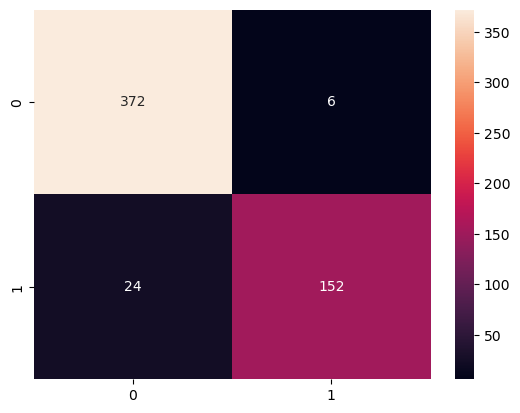

In [8]:
cm = confusion_matrix(y_test, y_hat)

sns.heatmap(cm, annot = True, fmt = 'd');

In [9]:
DT = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy')

DT.fit(X_train, y_train)
y_hat = DT.predict(X_test)
y_hat_train = DT.predict(X_train)

print(classification_report(y_test, y_hat))
print("Train Accuracy score: ", round((accuracy_score(y_train, y_hat_train) * 100), 2), "%")
print("Test Accuracy score: ", round((accuracy_score(y_test, y_hat) * 100), 2), "%")
print("Cross Validation:\n", cross_val_score(DT, X, Y, cv = 5, n_jobs = -1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       378
           1       0.80      0.84      0.82       176

    accuracy                           0.88       554
   macro avg       0.86      0.87      0.87       554
weighted avg       0.88      0.88      0.88       554

Train Accuracy score:  91.6 %
Test Accuracy score:  88.27 %
Cross Validation:
 [0.88808664 0.89169675 0.92779783 0.90777577 0.89692586]


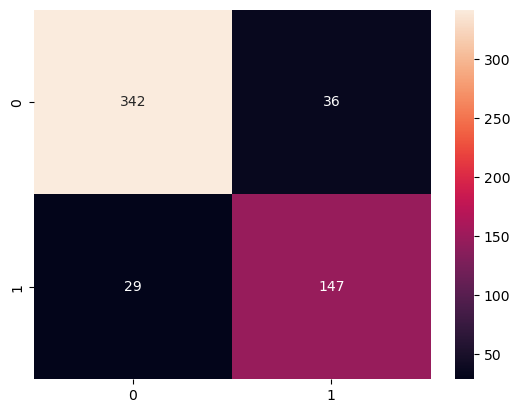

In [10]:
cm = confusion_matrix(y_test, y_hat)

sns.heatmap(cm, annot = True, fmt = 'd');

In [11]:
KNN = KNeighborsClassifier(n_jobs= -1)

KNN.fit(X_train, y_train)
y_hat = KNN.predict(X_test)
y_hat_train = KNN.predict(X_train)

print(classification_report(y_test, y_hat))
print("Train Accuracy score: ", round((accuracy_score(y_train, y_hat_train) * 100), 2), "%")
print("Test Accuracy score: ", round((accuracy_score(y_test, y_hat) * 100), 2), "%")
print("Cross Validation:\n", cross_val_score(KNN, X, Y, cv = 5, n_jobs = -1))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       378
           1       0.72      0.70      0.71       176

    accuracy                           0.82       554
   macro avg       0.79      0.79      0.79       554
weighted avg       0.82      0.82      0.82       554

Train Accuracy score:  94.31 %
Test Accuracy score:  81.77 %
Cross Validation:
 [0.84837545 0.88628159 0.90974729 0.91139241 0.93851718]


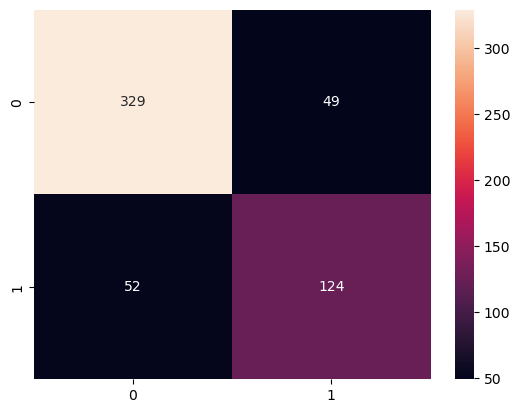

In [12]:
cm = confusion_matrix(y_test, y_hat)

sns.heatmap(cm, annot = True, fmt = 'd');

In [13]:
LR = LogisticRegressionCV(n_jobs= -1)

LR.fit(X_train, y_train)
y_hat = LR.predict(X_test)
y_hat_train = LR.predict(X_train)

print(classification_report(y_test, y_hat))
print("Train Accuracy score: ", round((accuracy_score(y_train, y_hat_train) * 100), 2), "%")
print("Test Accuracy score: ", round((accuracy_score(y_test, y_hat) * 100), 2), "%")
print("Cross Validation:\n", cross_val_score(LR, X, Y, cv = 5, n_jobs = -1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       378
           1       0.70      0.60      0.64       176

    accuracy                           0.79       554
   macro avg       0.76      0.74      0.75       554
weighted avg       0.78      0.79      0.79       554

Train Accuracy score:  77.64 %
Test Accuracy score:  79.06 %
Cross Validation:
 [0.77256318 0.77797834 0.79422383 0.79023508 0.7721519 ]


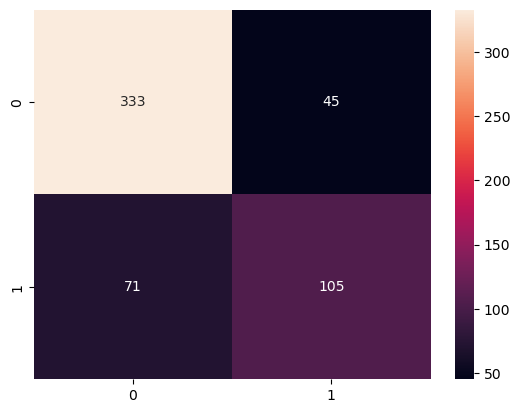

In [14]:
cm = confusion_matrix(y_test, y_hat)

sns.heatmap(cm, annot = True, fmt = 'd');

In [15]:
with open("RandomForestModel.pkl", "wb") as f:
    pickle.dump(RF, f)